<a href="https://colab.research.google.com/github/PrachiJadhav12/Seoul_Bike_Sharing_Prediction/blob/main/Capstone_Project_3_Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u>Project Title : Seoul Bike Sharing Demand Prediction<u><b>

**Project Type** : Regression Model

**Team members Name** : **Dr. Raj Kumar**   and  **Prachi Jadhav**

# **1-Business Context** 

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

**List of content**:

* Business Context
* Problem statement
* Importing Essential Libraries
* Load dataset and Data Exploration
* Data Preprocessing 
* Exploratory Data Analysis
* Feature engineering
* ML model implementation
* Model explainability 
* Summary and conclusions

# **Problem Statement**

* We have a Dataset contains the hourly and daily count of rental bikes between 
years 2017 and 2018 in capital bike share system with the corresponding weather and seasonal information. it is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time, eventually, providing the city with a stable supply of rental bikes. The goal of this project is to build a best ML model that is able to predict the demand of rental bikes in the city of Seoul. 

# **2. Importing Essential Libraries**

In [ ]:
# Importing Pandas and Numpy
import pandas as pd
import numpy as np
from numpy import math

# importing visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from seaborn.rcmod import set_style

import datetime as dt
from datetime import datetime

# Importing Models libraries
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate, cross_val_score

# import evaluation metrics
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Importing warning for ignore warnings
import warnings
warnings.filterwarnings('ignore')

#to display all the graph in the workbook 
sns.set_style("whitegrid",{'grid.linestyle': '--'})


# **3-Load dataset and Data Exploration**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load dataset

df = pd.read_csv('/content/drive/MyDrive/Data Set/SeoulBikeData.csv',encoding= 'unicode_escape')

In [ ]:
#Making a copy of dataset for safety purpose
df_copy = df.copy()

In [ ]:
# Overview of Data
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## **3.1-Data Description** 

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

**Attribute Information:** 

* **Date** - year-month-day
* **Rented Bike count** - Count of bikes rented at each hour
* **Hour** - Hour of the day
* **Temperature** - Temperature in Celsius
* **Humidity** - %
* **Windspeed** - m/s
* **Visibility** - 10m
* **Dew point temperature** - Celsius
* **Solar radiation** - MJ/m2
* **Rainfall** - mm
* **Snowfall** - cm
* **Seasons** - Winter, Spring, Summer, Autumn
* **Holiday** - Holiday/No holiday
* **Functional Day** - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
# Shape of dateset
df.shape

(8760, 14)

In [ ]:
# Column of dataset
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# Statistical info 

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


# **4-Data Preprocessing**

### **Data preprocessing is done in the following steps:-**
* 1) Data cleaning
* 2) Data Transformation
* 3) Data Reduction

### **Step-1: Data cleaning**

In [ ]:
#finding the null values
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

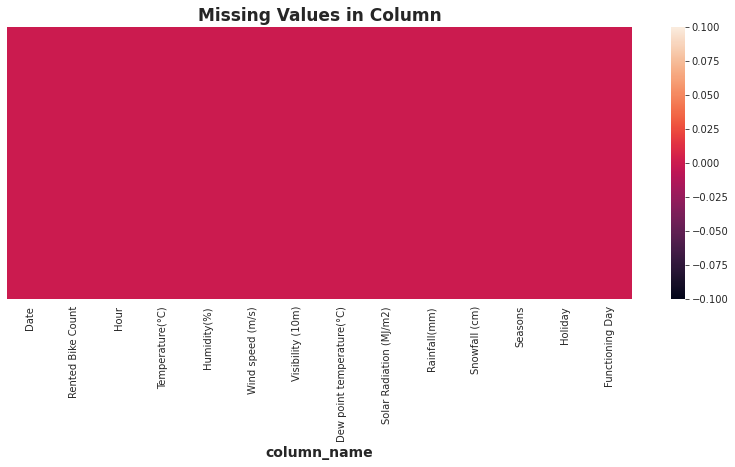

In [ ]:
# Checking Missing Values

plt.figure(figsize=(14, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("Missing Values in Column",fontweight="bold",size=17)
plt.show()

In [ ]:
#checking unique values
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [ ]:
#checking duplicate values
print(len(df[df.duplicated()]))

0


### **Observation:** 
* There is no missing and duplicate values in dataset.

### **Step-2: Data Transformation**

In [ ]:
# finding the datatype of 'Date' column

type(df['Date'][0])

str

In [ ]:
# converting string format of 'Date' column into date-time format

df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# extracting day,month, day of week and weekdays/weekend from date column

df['month'] = df['Date'].dt.month
df['day_of_week'] = df['Date'].dt.day_name()

#Converted weekdays and weekend into binary class as Weekdays = 0 and Weekend = 1.
df['weekdays_weekend']=df['day_of_week'].apply(lambda x : "1" if x=='Saturday' or x=='Sunday' else "0" )


### **Step-3: Data Reduction**

In [ ]:
# Remove date, day_of_week column from data set
df=df.drop(columns=['Date','day_of_week'],axis=1)

In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


# **5-Performing EDA**

#### Look at the data, Hour and month Columns are a numerical columns but these are time stamp so we have to treat Hour and month columns as a categorical feature

In [ ]:
# convert Hour column integer to Categorical 
df['Hour']=df['Hour'].astype('object')

# convert month column integer to Categorical 
df['month']=df['month'].astype('object')


In [ ]:
# Divide Data in categorical and numerical features
numeric_features= df.select_dtypes(exclude='object')
categorical_features=df.select_dtypes(include='object')

## **5.1-Analyzing the distribution of the dependent variable**

In [ ]:
# defining dependent variable separately
dependent_variable = ['Rented Bike Count']

Text(0.5, 1.0, 'Distribution of the dependent variable')

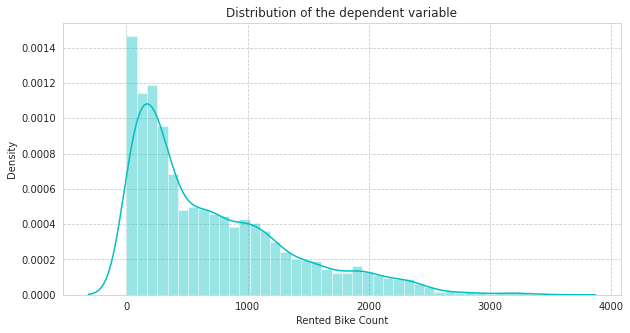

In [ ]:
# visualizing the distribution of the dependent variable - rental bike count
plt.figure(figsize=(10,5))
sns.distplot(df['Rented Bike Count'],color="c") 
plt.title('Distribution of the dependent variable')

In [ ]:
#skew of the dependant varaible
df[dependent_variable].skew()

Rented Bike Count    1.153428
dtype: float64

* **Rented Bike Count has moderate skewness toward right. As assumption of linear regression tells us that the distribution of dependent variable has to be normal, hence we will perform some operation to make it normal.**

* **After applying the Square Rooting the skewed Rented Bike Count, we almost got the normal distribution.**

Text(0.5, 1.0, 'Distribution of the dependent variable after sqrt')

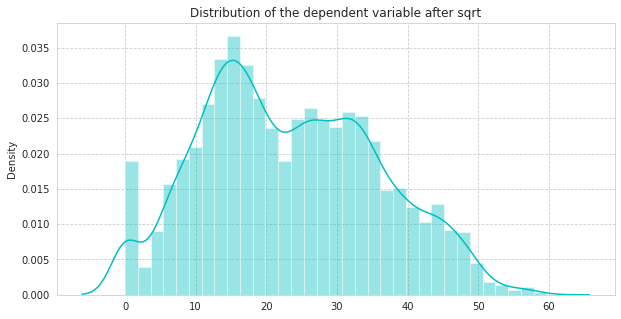

In [ ]:
# visualizing the distribution of dependent variable after sqrt transformation
plt.figure(figsize=(10,5))
sns.distplot(np.sqrt(df[dependent_variable]),color="c")
plt.title('Distribution of the dependent variable after sqrt')

In [ ]:
# skew of the dependent variable after sqrt transformation
np.sqrt(df[dependent_variable]).skew()

Rented Bike Count    0.237362
dtype: float64

**Obervation:**
* skewness is reduce after square root of dependent variable. Therefore, We will use sqrt of dependent variable in ML modeling.

## **5.2-EDA on Categorical Features**

In [ ]:
categorical_features

,Hour,Seasons,Holiday,Functioning Day,month,weekdays_weekend
0,0,Winter,No Holiday,Yes,1,0
1,1,Winter,No Holiday,Yes,1,0
2,2,Winter,No Holiday,Yes,1,0
3,3,Winter,No Holiday,Yes,1,0
4,4,Winter,No Holiday,Yes,1,0
...,...,...,...,...,...,...
8755,19,Autumn,No Holiday,Yes,11,0
8756,20,Autumn,No Holiday,Yes,11,0
8757,21,Autumn,No Holiday,Yes,11,0
8758,22,Autumn,No Holiday,Yes,11,0


In [ ]:
# checking categorical column value count
for i in categorical_features.columns:
  print("\n ")
  print('column name  : ', i)
  print(df[i].value_counts())


 
column name  :  Hour
0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: Hour, dtype: int64

 
column name  :  Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

 
column name  :  Holiday
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

 
column name  :  Functioning Day
Yes    8465
No      295
Name: Functioning Day, dtype: int64

 
column name  :  month
1     744
3     744
5     744
7     744
8     744
10    744
12    744
4     720
6     720
9     720
11    720
2     672
Name: month, dtype: int64

 
column name  :  weekdays_weekend
0    6216
1    2544
Name: weekdays_weekend, dtype: int64


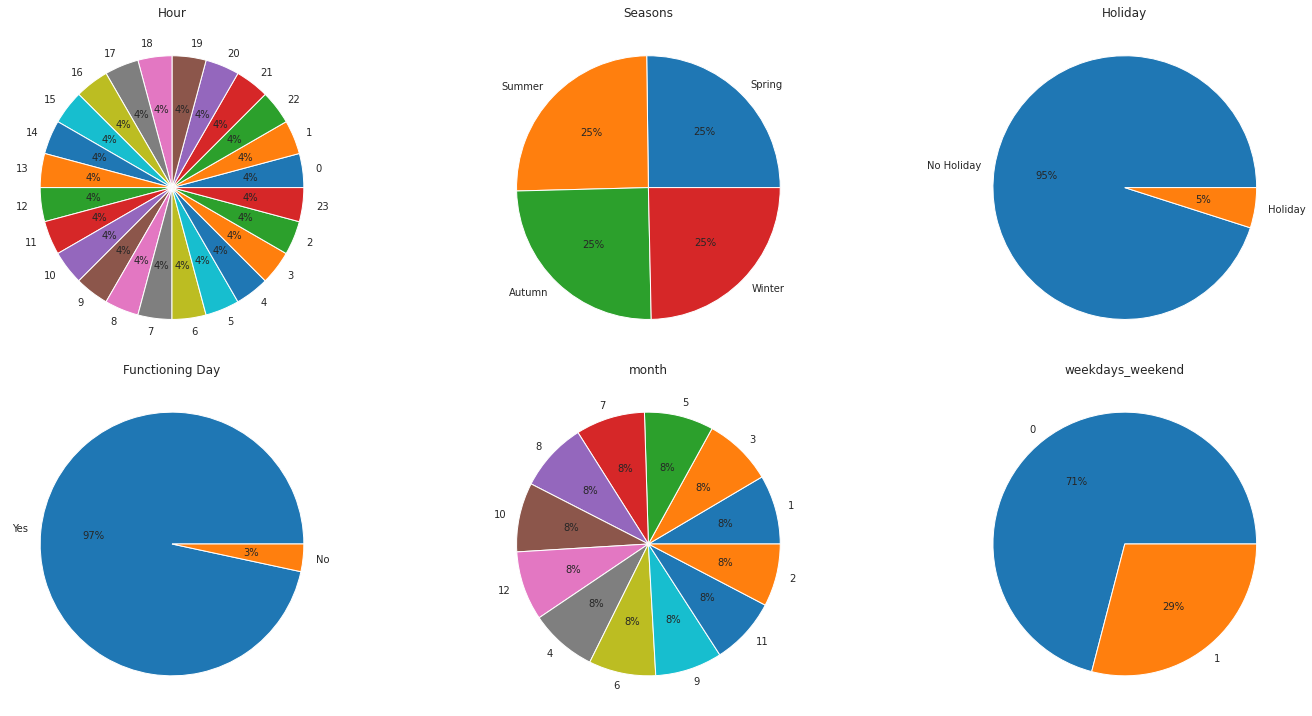

In [ ]:
# creating pieplot for all categorical feature
n=1
plt.figure(figsize=(20,15))
for i in categorical_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  plt.pie(df[i].value_counts(),labels = df[i].value_counts().keys().tolist(),autopct='%.0f%%')
  plt.title(i)
  plt.tight_layout()

### **5.2.1-Explore relation between categorical feature and dependent variable**

Text(0.5, 1.0, 'Count of Rented bikes based on Functioning Day')

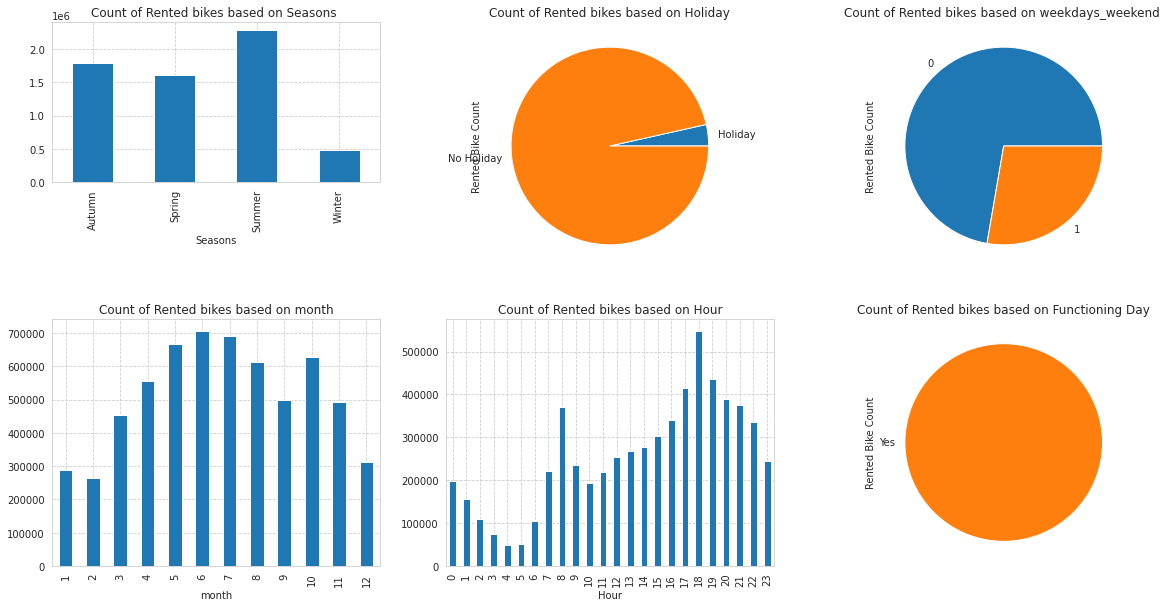

In [ ]:
# Count of rented bike based on each categorical features

fig = plt.figure(figsize=(20, 10))
axes = fig.add_subplot(3, 3, 1)
df_season = df.groupby('Seasons').sum()
df_season['Rented Bike Count'].plot(kind='bar')
plt.title('Count of Rented bikes based on Seasons ')

axes = fig.add_subplot(2, 3, 2)
df_hol = df.groupby('Holiday').sum()
df_hol['Rented Bike Count'].plot(kind='pie')
plt.title('Count of Rented bikes based on Holiday')

axes = fig.add_subplot(2, 3, 3)
df_week = df.groupby('weekdays_weekend').sum()
df_week['Rented Bike Count'].plot(kind='pie')
plt.title('Count of Rented bikes based on weekdays_weekend ')

axes = fig.add_subplot(2, 3, 4)
df_mon = df.groupby('month').sum()
df_mon['Rented Bike Count'].plot(kind='bar')
plt.title('Count of Rented bikes based on month')

axes = fig.add_subplot(2, 3, 5)
df_hour = df.groupby('Hour').sum()
df_hour['Rented Bike Count'].plot(kind='bar')
plt.title('Count of Rented bikes based on Hour')

axes = fig.add_subplot(2, 3, 6)
df_hour = df.groupby('Functioning Day').sum()
df_hour['Rented Bike Count'].plot(kind='pie')
plt.title('Count of Rented bikes based on Functioning Day')

### **Observation:** 

* Most of bikes have been rented in summer followed by Autumn, Spring and Winter.
* Use of rented bike is more on 'No holiday' means on working days as compared to 'Holiday'.
* Most of the bikes have been rented on working days.
* People generally use rented bikes during their working hours.
* People use rented bike only in functioning day.

## **5.3-EDA on Numeric features**


In [ ]:
numeric_features

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [ ]:
# checking numeric features value count
for i in numeric_features.columns:
  print("\n ")
  print('column name  : ', i)
  print(df[i].value_counts())


 
column name  :  Rented Bike Count
0       295
122      19
223      19
262      19
165      18
       ... 
2096      1
2440      1
1600      1
3384      1
595       1
Name: Rented Bike Count, Length: 2166, dtype: int64

 
column name  :  Temperature(°C)
 19.1    40
 20.5    40
 23.4    39
 7.6     38
 20.7    38
         ..
-13.6     1
-12.9     1
-12.6     1
 37.6     1
 36.9     1
Name: Temperature(°C), Length: 546, dtype: int64

 
column name  :  Humidity(%)
53    173
97    173
43    164
57    159
56    157
     ... 
19     11
13      3
10      1
12      1
11      1
Name: Humidity(%), Length: 90, dtype: int64

 
column name  :  Wind speed (m/s)
1.1    420
1.2    403
1.0    388
0.9    388
0.8    385
      ... 
7.2      1
6.1      1
7.3      1
6.9      1
5.7      1
Name: Wind speed (m/s), Length: 65, dtype: int64

 
column name  :  Visibility (10m)
2000    2245
1995      34
1985      28
1999      28
1989      28
        ... 
892        1
1656       1
1851       1
627        1
1688  

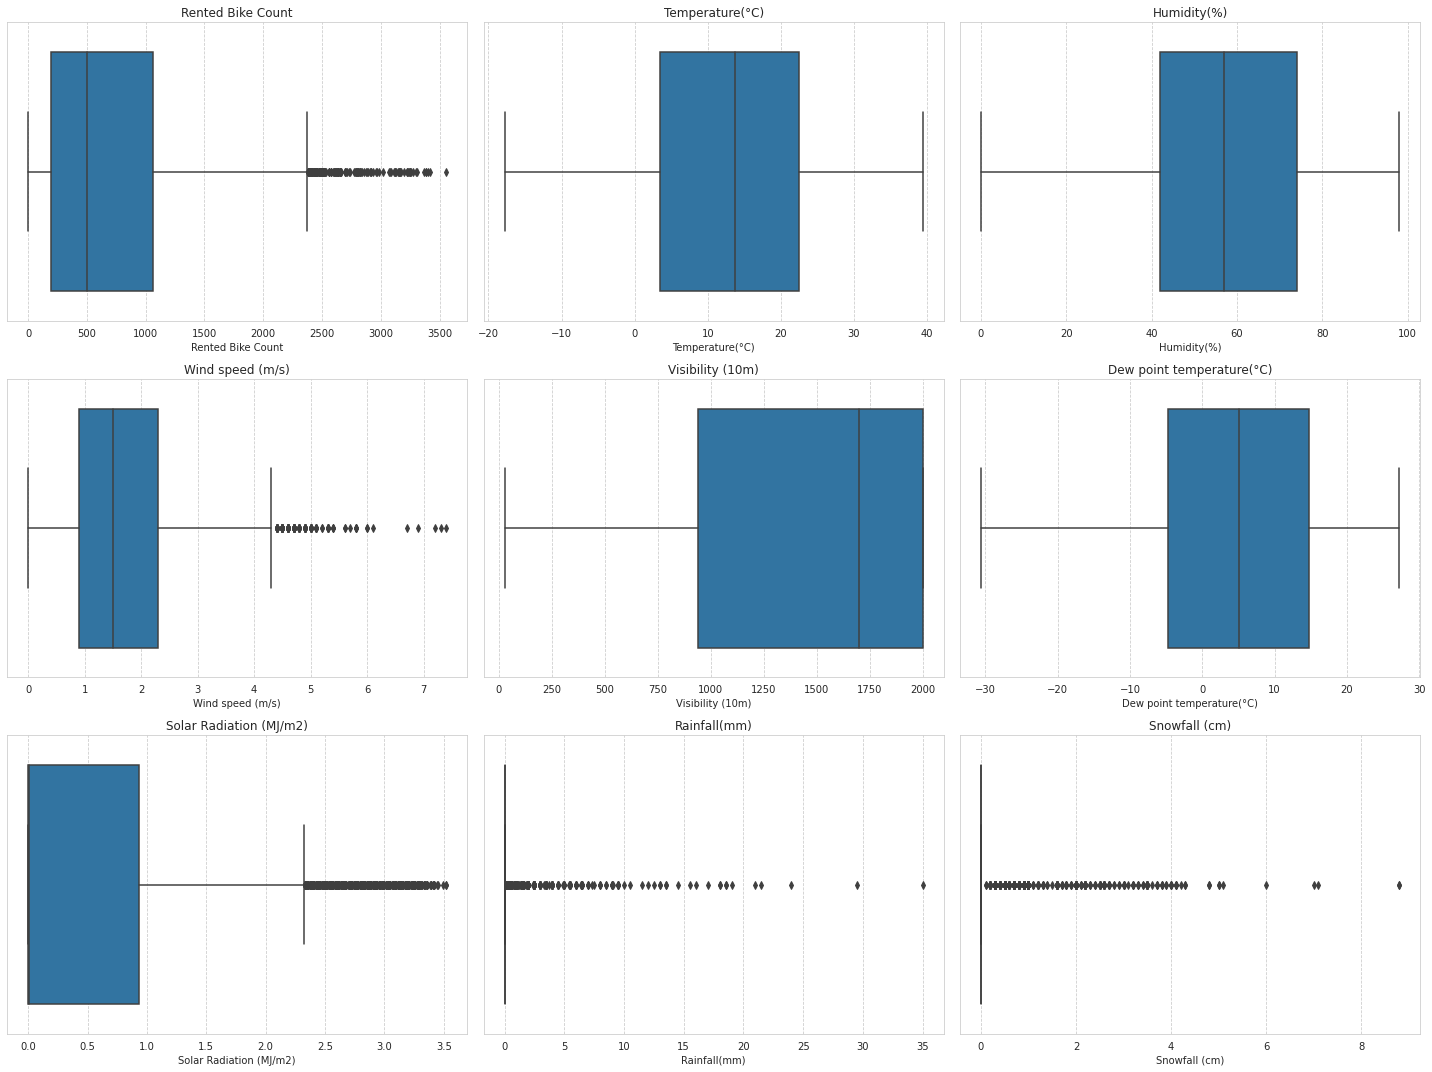

In [ ]:
# checking Outliers in numeric features using seaborn boxplot
n = 1
plt.figure(figsize=(20,15))

for i in numeric_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(df[i])
  plt.title(i)
  plt.tight_layout()

**Observation:**
* In our dataset there is outlier presented, but we don't have to worry about outliers, because When we are treating the outlieres from Rainfall and snowfall columns using IQR its removed all the information of the data and all values became zero. 

### **Plotting histogram with mean and median, and distplot of all the numeric features of the dataset**



================================================== Rented Bike Count ==================================================




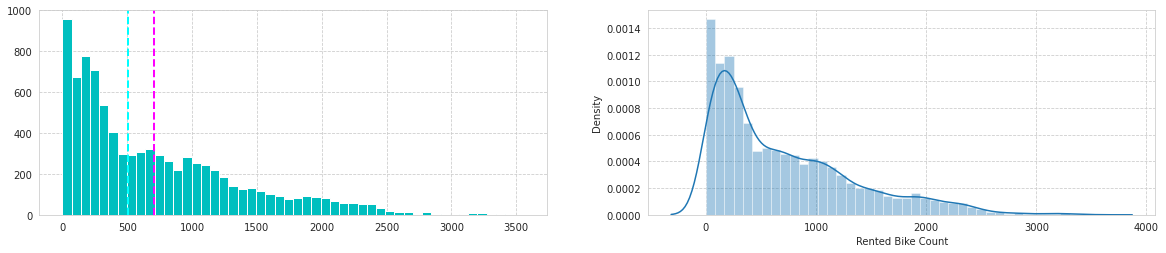



================================================== Temperature(°C) ==================================================




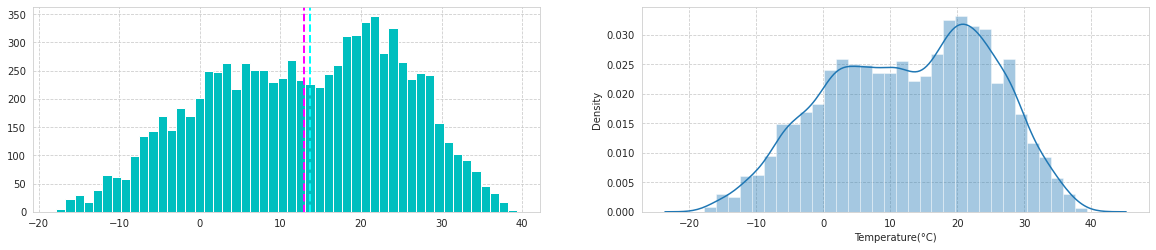



================================================== Humidity(%) ==================================================




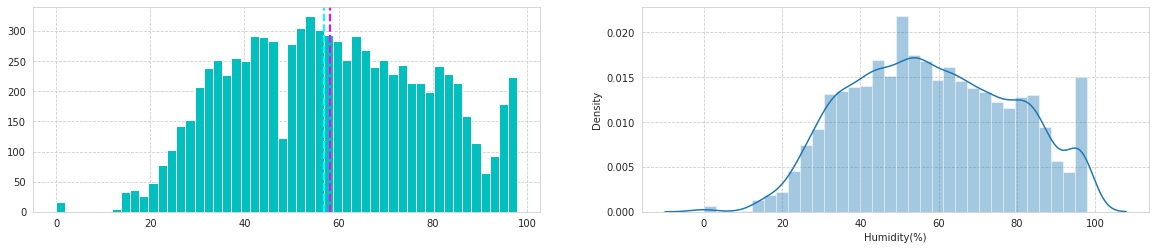



================================================== Wind speed (m/s) ==================================================




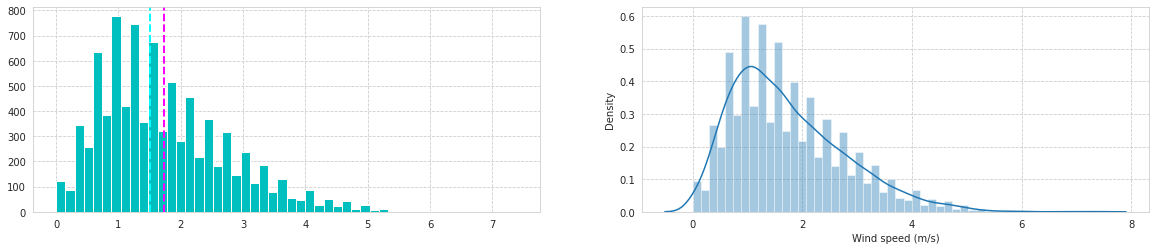



================================================== Visibility (10m) ==================================================




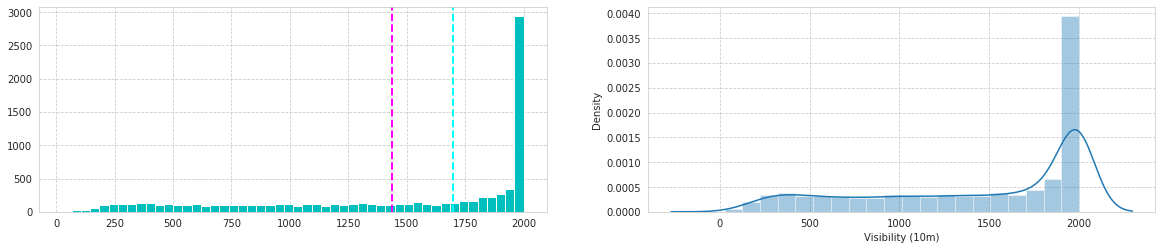



================================================== Dew point temperature(°C) ==================================================




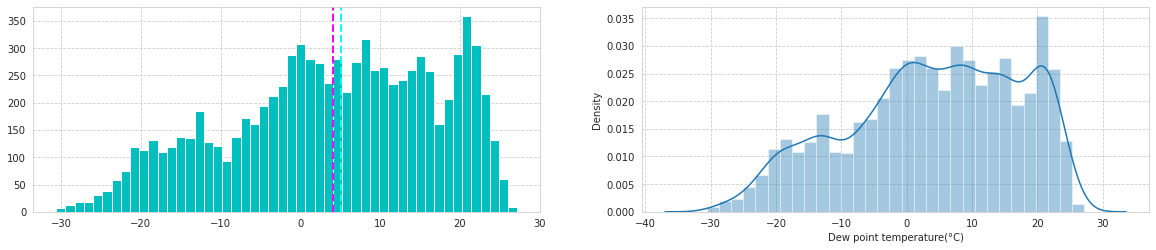



================================================== Solar Radiation (MJ/m2) ==================================================




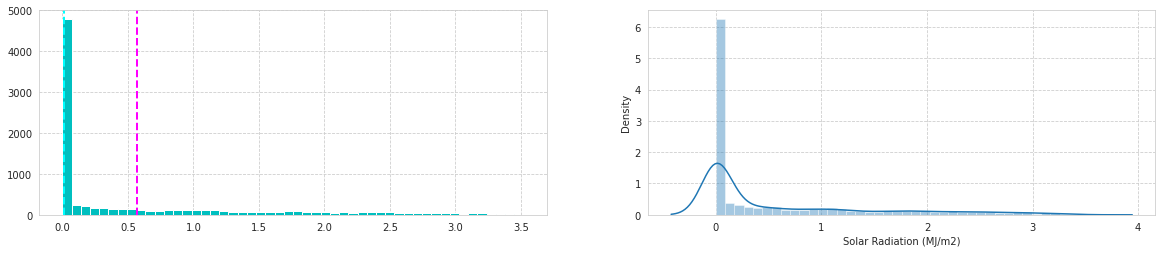



================================================== Rainfall(mm) ==================================================




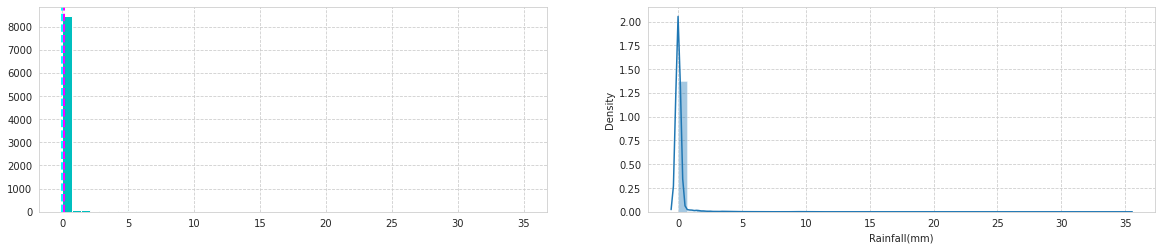



================================================== Snowfall (cm) ==================================================




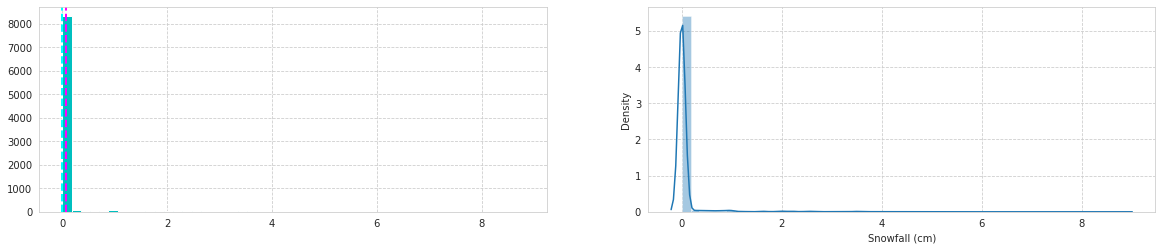

In [ ]:
# Analyzing the distribution of the numeric independent variables

n=1
for i in numeric_features.columns:
  plt.figure(figsize=(20,40))
  plt.subplot(9,2,n)
  n+=1
  print('\n')
  print('='*50,i,'='*50)
  print('\n')
  
  feature=df[i]
  feature.hist(bins=50,color="c")
  plt.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2) 
  plt.subplot(9,2,n)
  n+= 1
  sns.distplot(df[i])
  plt.show()

**Observations**: 


* **Normally distributed attributes:** temperature, humidity,Dew point temperature(°C).
* **Positively skewed attributes:** wind, solar_radiation, snowfall, rainfall.
* **Negatively skewed attributes:** visibility.

## **Regression plot to know relation between dependent variable and numerical feature**

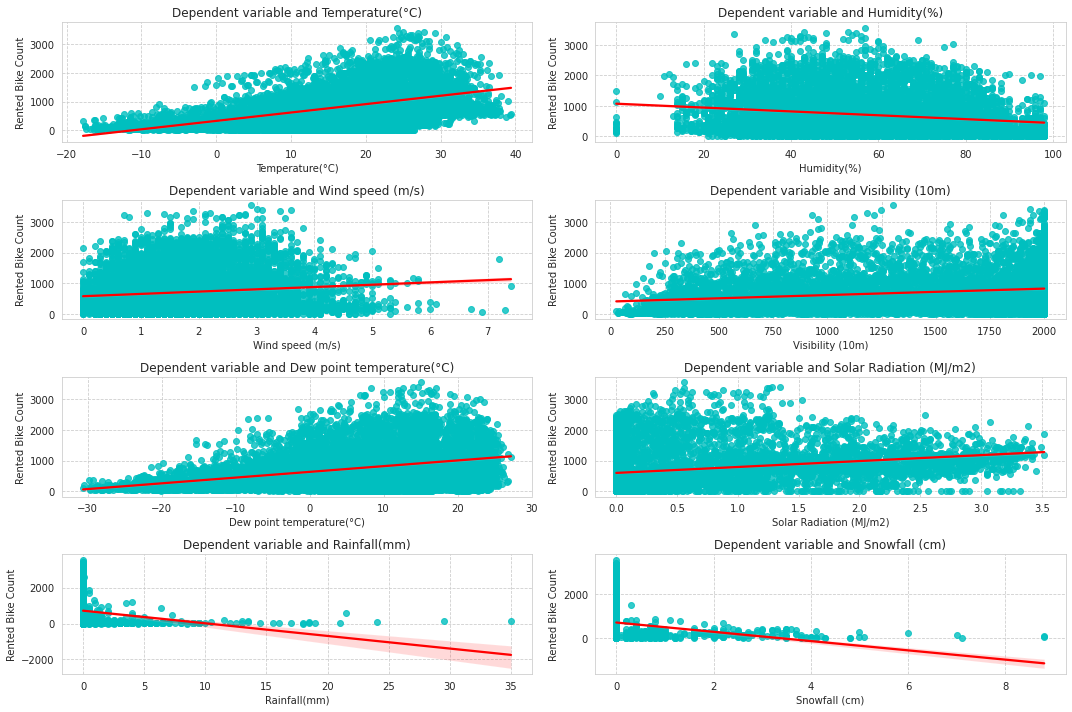

In [ ]:
n=1
plt.figure(figsize=(15,10))
for i in numeric_features.columns:
  if i == 'Rented Bike Count':
    pass
  else:
    plt.subplot(4,2,n)
    n+=1
    sns.regplot(x=df[i], y=df['Rented Bike Count'],scatter_kws={"color": "c"}, line_kws={"color": "red"})
    plt.title(f'Dependent variable and {i}')
    plt.tight_layout()

**Observations**:

*   Linear regression graph clearly shows that Hour, Temperature,Wind_speed, Visibility and Solar-Radiation are positively related to the dependent variable, i.e., Rented bike count increases with increase of these features.
*  On the other hand, Rainfall, Snowfall, Humidity are negatively related with the dependent variable, i.e., the rented bike count decreases when these features increases.



## **5.4-Check Correlation and Multicollinearity between features**

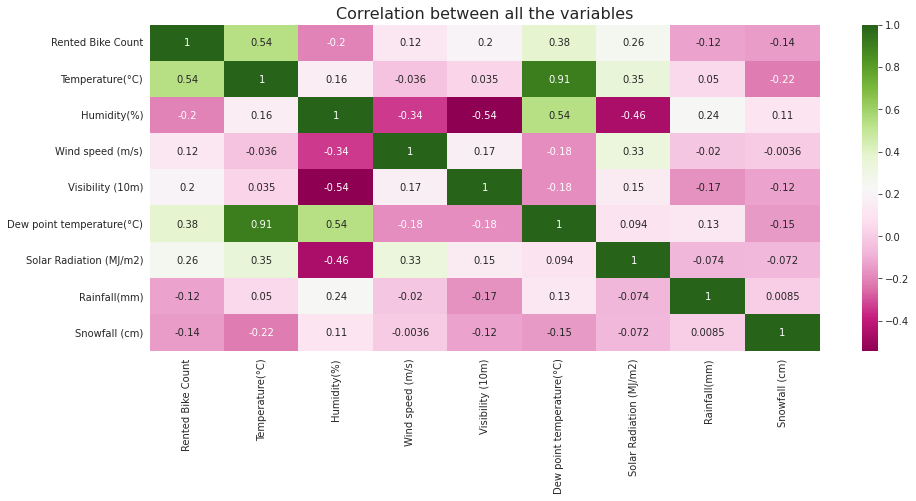

In [ ]:
#checking correlation between independent features using heatmap

plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),cmap='PiYG',annot=True)
plt.title('Correlation between all the variables', size=16)
plt.show()

In [ ]:
# Function to calculate Multicollinearity

# Checking the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  # VIF dataframe
  vif_data = pd.DataFrame()
  vif_data["feature"] = X.columns
  
  # calculating VIF for each feature
  vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  vif_data['VIF'] = round(vif_data['VIF'],2)
  return(vif_data)

In [ ]:
calc_vif(df[[i for i in df.describe().columns]])

,feature,VIF
0,Rented Bike Count,3.62
1,Temperature(°C),34.56
2,Humidity(%),5.09
3,Wind speed (m/s),4.57
4,Visibility (10m),9.06
5,Dew point temperature(°C),16.04
6,Solar Radiation (MJ/m2),2.89
7,Rainfall(mm),1.10
8,Snowfall (cm),1.12


**Observation**: 

* **From heatmap and VIF, we can clearly visible Temperature and Dew point temperature(°C) has the high correlation and high multicollinearity respectively. As a result, to reduce correlation and multicollinearity We can drop dew point temperature column.**

In [ ]:
# Drop Dew Point Temperature Column

df.drop(columns= ['Dew point temperature(°C)'], inplace=True)

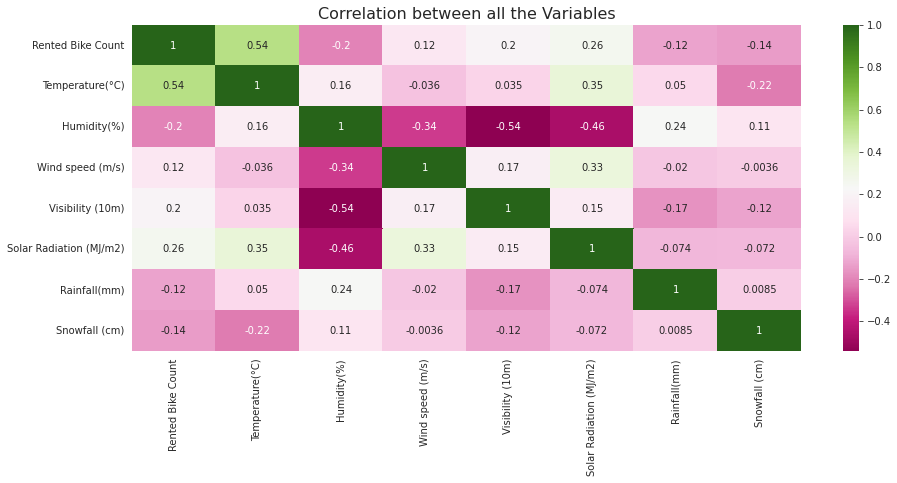

In [ ]:
# Again plot correlation using heatmap

plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),cmap='PiYG',annot=True)
plt.title('Correlation between all the Variables', size=16)
plt.show()

In [ ]:
# Again check multicolinearilty
calc_vif(df[[i for i in df.describe().columns]])
# calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

,feature,VIF
0,Rented Bike Count,3.43
1,Temperature(°C),4.42
2,Humidity(%),4.83
3,Wind speed (m/s),4.21
4,Visibility (10m),4.71
5,Solar Radiation (MJ/m2),2.25
6,Rainfall(mm),1.10
7,Snowfall (cm),1.12


**Observation:** 

* After removable of dew point temperature column, correlation between dependent variable and multicollinearity could be controlled.

**Creating dummy variables and performing the one hot encoding to the dataset:**

# **6-Feature Engineering**

In [ ]:
#Changing the int64 column into category column
cols=['Hour','month','weekdays_weekend']
for col in cols:
  df[col]= df[col].astype('category')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Rented Bike Count        8760 non-null   int64   
 1   Hour                     8760 non-null   category
 2   Temperature(°C)          8760 non-null   float64 
 3   Humidity(%)              8760 non-null   int64   
 4   Wind speed (m/s)         8760 non-null   float64 
 5   Visibility (10m)         8760 non-null   int64   
 6   Solar Radiation (MJ/m2)  8760 non-null   float64 
 7   Rainfall(mm)             8760 non-null   float64 
 8   Snowfall (cm)            8760 non-null   float64 
 9   Seasons                  8760 non-null   object  
 10  Holiday                  8760 non-null   object  
 11  Functioning Day          8760 non-null   object  
 12  month                    8760 non-null   category
 13  weekdays_weekend         8760 non-null   category
dtypes: categ

In [ ]:
#using pandas get dummies for encoding categorical features
df1= pd.get_dummies(df,drop_first=True,sparse = True)
df1.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_1,Hour_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df1.columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4',
       'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11',
       'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17',
       'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Functioning Day_Yes', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'weekdays_weekend_1'],
      dtype='object')

# **7-ML model implementation with SciKit-Learn**

In [ ]:
# Data spliting and value assigning to variables for Reggression

X = df1.drop(columns = ['Rented Bike Count'] , axis = 1)
y = np.sqrt(df1['Rented Bike Count'])

In [ ]:
X.head()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_1,Hour_2,Hour_3,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented Bike Count, dtype: float64

In [ ]:
# train test split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


In [ ]:
X_train.head()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_1,Hour_2,Hour_3,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
8415,13.2,61,3.9,719,1.03,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5049,22.9,86,1.7,538,0.76,0.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8395,11.2,46,1.4,869,0.00,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1535,-2.6,69,2.0,1434,0.00,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5518,27.2,73,1.5,1005,0.00,0.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
X_test.head()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_1,Hour_2,Hour_3,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
6056,27.2,69,1.8,1999,0.70,0.0,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5556,32.6,51,2.1,800,3.21,0.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5990,34.0,50,1.2,1744,1.68,0.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
7674,16.9,47,1.4,1637,0.11,0.0,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3319,6.4,51,1.0,1398,0.19,0.0,0.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
y_train.head()

8415    31.543621
5049    34.568772
8395    38.052595
1535    13.341664
5518    44.497191
Name: Rented Bike Count, dtype: float64

In [ ]:
y_test.head()

6056    41.569219
5556    28.670542
5990    25.651511
7674    52.115257
3319    32.908965
Name: Rented Bike Count, dtype: float64

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7008, 47), (1752, 47), (7008,), (1752,))

## **7.1-Linear Regression**

In [ ]:
# Train test spliting


print(X_train.shape)
X_test.shape

(7008, 47)


(1752, 47)

In [ ]:
# initalizing the model
regg = LinearRegression().fit(X_train,y_train)

### **Fit/Train the Model on the training data**
* Make sure you only fit to the training data, in order to fairly evaluate your model's performance on future data

### **Calculate Performance on Test Set**

We want to fairly evaluate our model, so we get performance metrics on the test set (data the model has never seen before).

In [ ]:
# Predicted Train & Test values
 
y_pred_train = regg.predict(X_train)
y_pred_test = regg.predict(X_test)

In [ ]:
# Checking score
regg.score(X_train,y_train)

0.7610504712622701

In [ ]:
#Checking Coefficent
regg.coef_

array([ 4.61010037e-01, -1.34106653e-01, -1.76026501e-01,  4.83615746e-04,
        1.00189722e+00, -1.67738283e+00,  2.64296296e-03, -1.84852780e+00,
       -4.83772088e+00, -7.27620707e+00, -9.67259664e+00, -9.22931524e+00,
       -4.56458618e+00,  1.85265422e+00,  7.20939446e+00,  1.14050382e+00,
       -3.39748134e+00, -3.44710275e+00, -2.67967764e+00, -2.75309410e+00,
       -3.01875133e+00, -1.77241767e+00,  2.79903036e-01,  4.27539115e+00,
        1.02123996e+01,  7.16749083e+00,  6.43053523e+00,  6.60944287e+00,
        5.48599030e+00,  1.59485344e+00, -3.02808696e+00, -3.29229410e+00,
       -7.02337056e+00,  2.82141041e+00,  2.85179018e+01, -5.85302809e-01,
        5.00070502e-01,  3.36577892e-01,  1.61374932e+00,  4.22077400e+00,
       -2.03638162e-02, -6.22448205e-01,  2.72523313e-01,  2.15982743e+00,
        9.71248768e-01,  1.21402187e+00, -7.45772549e-01])

### **Evaluation on the Test Set**

### **Metrics**
**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [ ]:
# Performance Metrics calculation function 
def print_metrics(actual, predicted):
  print('MSE is: {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is: {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('R2 score: is {}'.format(r2_score(actual, predicted)))
  print('MAE is: {}'.format(mean_absolute_error(actual, predicted)))
  

In [ ]:
MSE = mean_squared_error((y_train), (y_pred_train))
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error((y_train), (y_pred_train))
R2 = r2_score((y_train), (y_pred_train))
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

In [ ]:
#Adjusted R2 (considers and tests different independent variables against the model)
def Adjusted_R2(actual, predicted):
  Adj_R2 = (1-(1-r2_score(actual, predicted))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
  return('Adjusted R2 :', Adj_R2)


In [ ]:
print_metrics(y_train, y_pred_train)
Adjusted_R2(y_train, y_pred_train)

MSE is: 37.104670636802304
RMSE is: 6.0913603272834145
R2 score: is 0.7610504712622701
MAE is: 4.63767947246597


('Adjusted R2 :', 0.7544597272184477)

In [ ]:
print_metrics(y_test, y_pred_test)
Adjusted_R2(y_test, y_pred_test)

MSE is: 38.26871330175553
RMSE is: 6.186171134211818
R2 score: is 0.7513671973021736
MAE is: 4.7013683908815915


('Adjusted R2 :', 0.744509367650297)

In [ ]:
# If our model is perfect, residuals would all be zeros
test_residuals = y_test - y_pred_test
test_residuals

6056    2.393985
5556   -5.220901
5990   -7.016662
7674    9.138558
3319    8.485402
          ...   
8307   -5.706761
100     0.541741
6605   -6.820735
1783    6.541555
6013   -8.206377
Name: Rented Bike Count, Length: 1752, dtype: float64

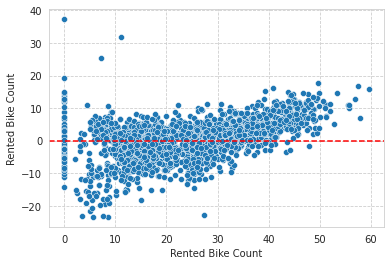

In [ ]:
# residual plot
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='r', ls='--')

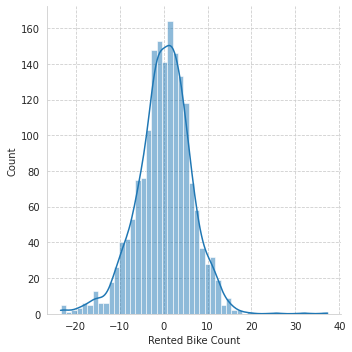

In [ ]:
# Check Normal probability plot
sns.displot(test_residuals, bins=50, kde=True)

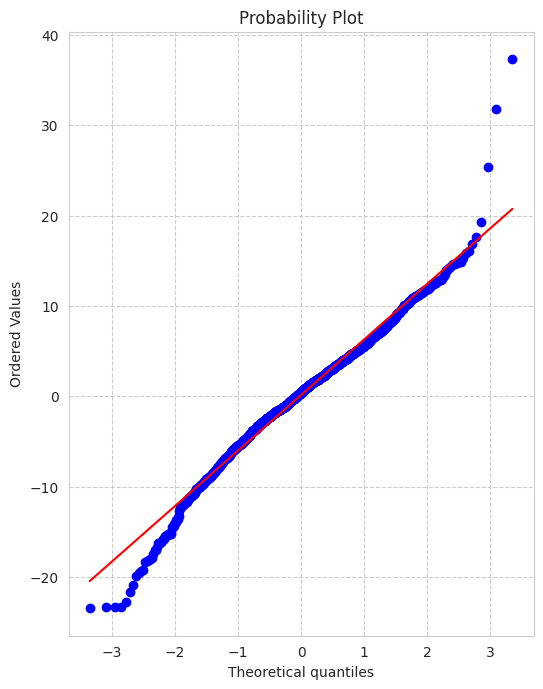

In [ ]:
import scipy as sp

# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
_ = sp.stats.probplot(test_residuals,plot=ax)

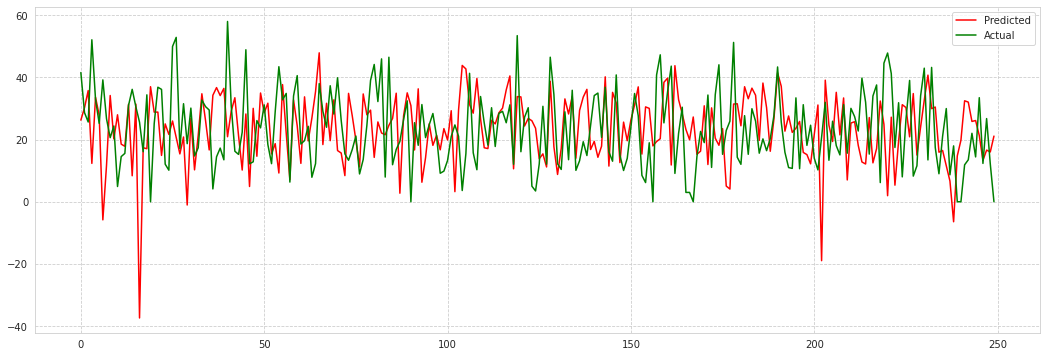

In [ ]:
# Plot between actual target variable vs Predicted one
plt.figure(figsize=(18,6))
plt.plot(y_pred_train[:250], color='r')
plt.plot(np.array(y_test)[:250], color='g')
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 1.0, 'Heteroscadacity of Linear model')

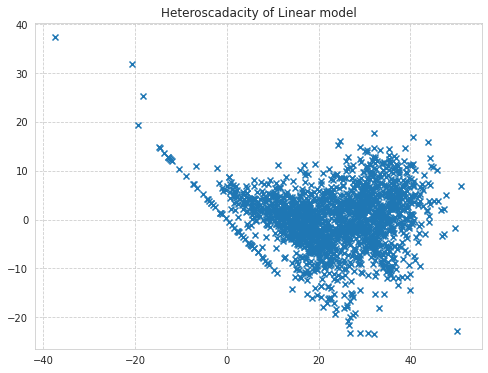

In [ ]:
#Checking Heteroscadacity
plt.figure(figsize=(8,6))
plt.scatter((y_pred_test),(y_test)-(y_pred_test),marker='x')
plt.title('Heteroscadacity of Linear model')

## **Observation:**

* From residual and normal Probability plot, it is clearly visible our model is not perfect. We have to go for next level. 

## **7.2-Polynomial Linear Regression**

* Transform our original data set by adding polynomial features

In [ ]:
# importing polynominal features from sklearn
from sklearn.preprocessing import PolynomialFeatures

# polynomial convertion
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [ ]:
# Converter "fits" to data, in this case, reads in every X column

poly_features = polynomial_converter.fit_transform(X)

In [ ]:
poly_features.shape

(8760, 1175)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)
test_predictions = model.predict(X_test)

In [ ]:
print_metrics(y_train, y_pred_train)

MSE is: 37.104670636802304
RMSE is: 6.0913603272834145
R2 score: is 0.7610504712622701
MAE is: 4.63767947246597


In [ ]:
Adjusted_R2(y_test, y_pred_test)

('Adjusted R2 :', 0.744509367650297)

## **7.3-Regularized Linear Regression**

Regularization attempts to minimize the RSS (residual sum of squares) and a penalty factor. This penalty factor will penalize models that have coefficients that are too large.

### **7.3.1-Ridge Regression(L2 regularization)**

In [ ]:
# Initalizing ridge regression
ridge = Ridge(alpha = 0.1)

ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
#checking score

ridge.score(X_train,y_train)

0.7610503994954073

In [ ]:
# Predicted Train & Test values

y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

### **Choosing an Alpha value with cross-validation**

In [ ]:
from sklearn.linear_model import RidgeCV

ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error',cv=5)

In [ ]:
ridge_cv_model.fit(X_train,y_train)
ridge_cv_model.alpha_

0.1

In [ ]:
test_predictions = ridge_cv_model.predict(X_test)

In [ ]:
print_metrics(y_test, test_predictions)
Adjusted_R2(y_test, test_predictions)

MSE is: 38.26674286091793
RMSE is: 6.186011870415213
R2 score: is 0.7513799993063628
MAE is: 4.701350342038489


('Adjusted R2 :', 0.7445225227614092)

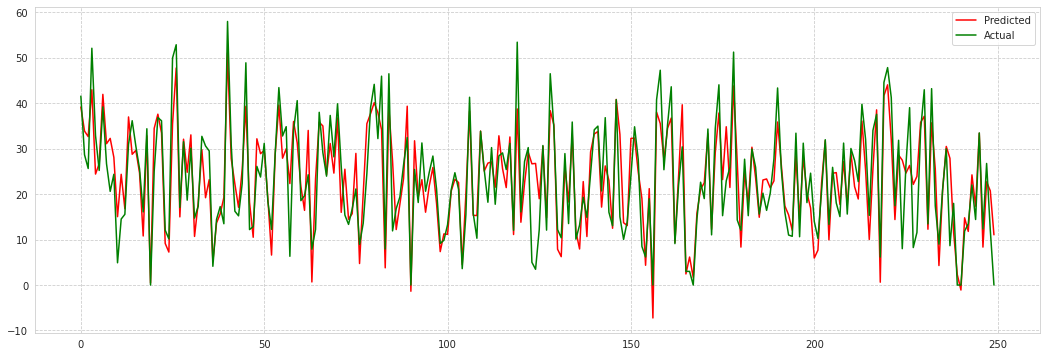

In [ ]:
# Plot between actual target variable vs Predicted one
plt.figure(figsize=(18,6))
plt.plot(test_predictions[:250], color='r')
plt.plot(np.array(y_test)[:250], color='g')
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 1.0, 'Heteroscadacity of Ridge regression model')

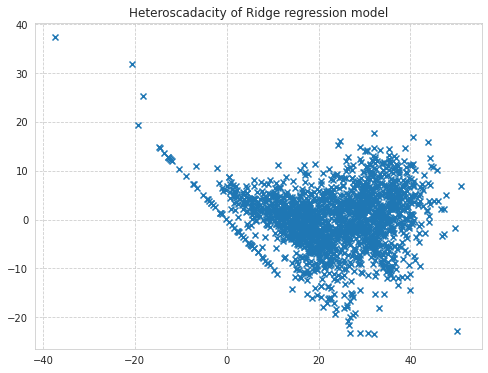

In [ ]:
#Checking Heteroscadacity
plt.figure(figsize=(8,6))
plt.scatter((test_predictions),(y_test)-(test_predictions),marker='x')
plt.title('Heteroscadacity of Ridge regression model')

### **7.3.2-Lasso Regression(L1 Regularization) with cross-validation**

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
# Initalizing lasso regression
lasso_cv_model = LassoCV(eps=0.001,n_alphas=100,cv=3,max_iter=1000000)
lasso_cv_model.fit(X_train, y_train)

LassoCV(cv=3, max_iter=1000000)

In [ ]:
# Creating the model score
print(lasso_cv_model.score(X_test, y_test))
print(lasso_cv_model.score(X_train, y_train))

0.4087749591139017
0.38712332001143324


In [ ]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=3, max_iter=1000000)

In [ ]:
lasso_cv_model.alpha_

1.5914361150302494

In [ ]:
test_predictions = lasso_cv_model.predict(X_test)

In [ ]:
# Calculate the performance metrics
print_metrics(y_test, test_predictions)
Adjusted_R2(y_test, test_predictions)

MSE is: 90.99934256859254
RMSE is: 9.539357555338437
R2 score: is 0.4087749591139017
MAE is: 7.2643570455251725


('Adjusted R2 :', 0.39246769566223105)

In [ ]:
# Predicted Train & Test values
y_pred_train_lasso=lasso_cv_model.predict(X_train)
y_pred_test_lasso=lasso_cv_model.predict(X_test)

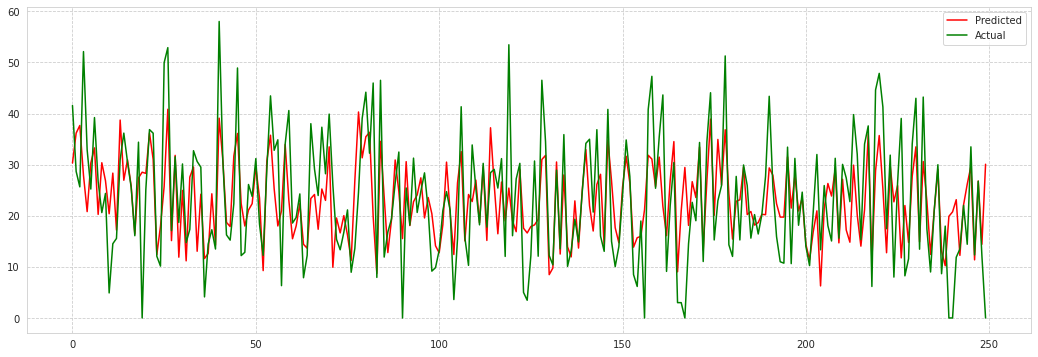

In [ ]:
# Plot between actual target variable vs Predicted one
plt.figure(figsize=(18,6))
plt.plot(test_predictions[:250], color='r')
plt.plot(np.array(y_test)[:250], color='g')
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 1.0, 'Heteroscadacity of Lasso regression model')

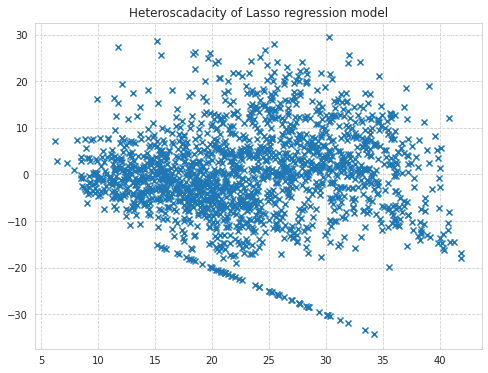

In [ ]:
#Checking Heteroscadacity
plt.figure(figsize=(8,6))
plt.scatter((test_predictions),(y_test)-(test_predictions),marker='x')
plt.title('Heteroscadacity of Lasso regression model')

### **7.3.3-Elastic Net Regression**

In [ ]:
# Initializing model
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
#checking score
elnet.score(X_train, y_train)

0.6163504245551145

In [ ]:
# Train Test values
y_pred_train_en=elnet.predict(X_train)
y_pred_test_en=elnet.predict(X_test)

In [ ]:
# Calculating Performance Metrics for training data
print_metrics((y_train), (y_pred_train_en))

MSE is: 59.57404985073649
RMSE is: 7.718422756673574
R2 score: is 0.6163504245551145
MAE is: 5.918023695770977


In [ ]:
#adjusted R2 score
Adjusted_R2((y_train), (y_pred_train_en))

('Adjusted R2 :', 0.6057685407253552)

In [ ]:
print_metrics((y_test), (y_pred_test_en))

MSE is: 57.48123203851177
RMSE is: 7.581637820320341
R2 score: is 0.626542974895274
MAE is: 5.81168908965639


In [ ]:
#adjusted R2 score
Adjusted_R2((y_test), (y_pred_test_en))

('Adjusted R2 :', 0.6162422236159769)

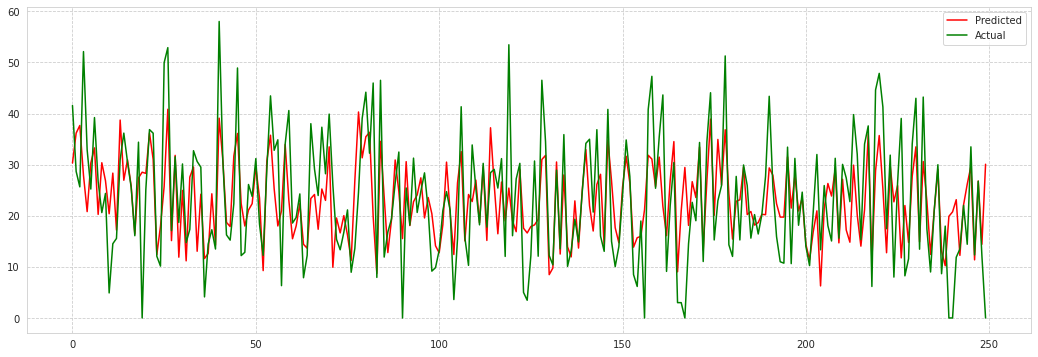

In [ ]:
# Plot between actual target variable vs Predicted one
plt.figure(figsize=(18,6))
plt.plot(test_predictions[:250], color='r')
plt.plot(np.array(y_test)[:250], color='g')
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 1.0, 'Heteroscadacity of Elastic Net regression model')

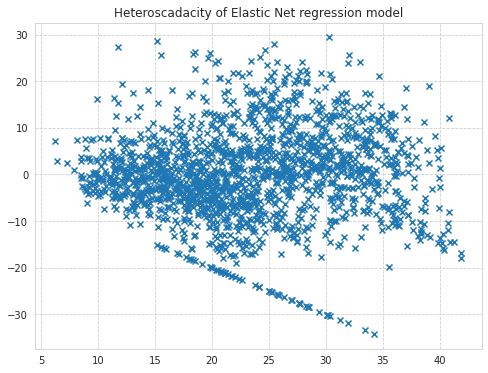

In [ ]:
#Checking Heteroscadacity
plt.figure(figsize=(8,6))
plt.scatter((test_predictions),(y_test)-(test_predictions),marker='x')
plt.title('Heteroscadacity of Elastic Net regression model')

# **7.4-Decision Tree Regression**

In [ ]:
#Initilazing the model
dt_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9, max_leaf_nodes=100)

In [ ]:
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [ ]:
#Train Test values
y_pred_train_d = dt_regressor.predict(X_train)
y_pred_test_d = dt_regressor.predict(X_test)

In [ ]:
# Calculating Performance Metrics for training data
print_metrics((y_train), (y_pred_train_d))

MSE is: 52.14526413580236
RMSE is: 7.221167782000523
R2 score: is 0.664190893563791
MAE is: 5.392001107566289


In [ ]:
# Calculating Performance Metrics for Test data
print_metrics((y_test), (y_pred_test_d))

MSE is: 54.72282460856023
RMSE is: 7.3974877227718485
R2 score: is 0.6444644180565182
MAE is: 5.586599495874404


In [ ]:
#adjusted R2 score
Adjusted_R2((y_train), (y_pred_train_d))

('Adjusted R2 :', 0.6549285531867359)

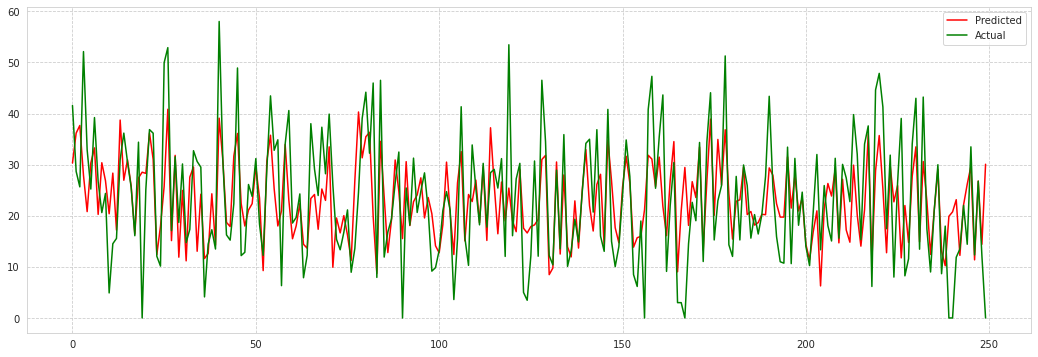

In [ ]:
# Plot between actual target variable vs Predicted one
plt.figure(figsize=(18,6))
plt.plot(test_predictions[:250], color='r')
plt.plot(np.array(y_test)[:250], color='g')
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 1.0, 'Heteroscadacity of Decision Tree regression model')

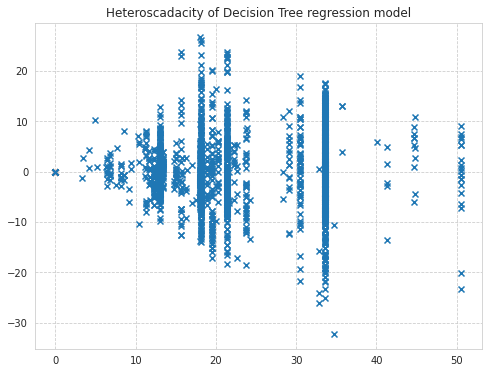

In [ ]:
#Checking Heteroscadacity
plt.figure(figsize=(8,6))
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d),marker='x')
plt.title('Heteroscadacity of Decision Tree regression model')

## **7.5-Random Forest Regression**

In [ ]:
# Initalizing the Model
rf_model = RandomForestRegressor(random_state=0)
parameters = {'n_estimators':[500],
             'min_samples_leaf':np.arange(25,31)
             }

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
#Train test values
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

In [ ]:
#Calculating Performance Metrics for train data
print_metrics((y_train), (y_pred_train_rf))

MSE is: 2.1074977026403836
RMSE is: 1.4517223228428995
R2 score: is 0.9864279732384341
MAE is: 0.9545874538275686


In [ ]:
#adjusted R2 score
Adjusted_R2((y_train), (y_pred_train_rf))

('Adjusted R2 :', 0.9860536274298698)

In [ ]:
# Calculating Performance Metrics for Test data
print_metrics((y_test), (y_pred_test_rf))

MSE is: 13.93589144234538
RMSE is: 3.733080690575196
R2 score: is 0.9094581591996186
MAE is: 2.5018214124836695


In [ ]:
#adjusted R2 score
Adjusted_R2((y_test), (y_pred_test_rf))

('Adjusted R2 :', 0.9069608196939742)

In [ ]:
# Feature importances
rf_model.feature_importances_

array([3.11765772e-01, 1.57305390e-01, 1.41809609e-02, 1.43646425e-02,
       2.73849542e-02, 3.30337396e-02, 1.19063264e-03, 4.37686839e-03,
       1.34870383e-02, 2.12795082e-02, 3.28562903e-02, 2.94792224e-02,
       1.15153966e-02, 3.70531979e-03, 1.33689273e-02, 9.97492397e-04,
       2.26043247e-03, 8.96639724e-04, 3.73616147e-04, 2.22928055e-04,
       3.58554843e-04, 1.19723001e-03, 3.83216348e-03, 1.07556425e-02,
       3.32475532e-02, 1.42960478e-02, 1.10648563e-02, 1.12380450e-02,
       7.51143649e-03, 2.97463750e-03, 6.40558680e-03, 1.44111687e-03,
       1.20353755e-02, 2.95279221e-03, 1.59190329e-01, 1.19431137e-03,
       2.82077090e-03, 1.40681555e-03, 1.67968614e-03, 1.75500270e-03,
       8.89746298e-04, 1.59298050e-03, 1.61691520e-03, 1.84245337e-03,
       2.31880482e-03, 9.18352050e-04, 9.41702116e-03])

In [ ]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

In [ ]:
plt.style.use('dark_background')

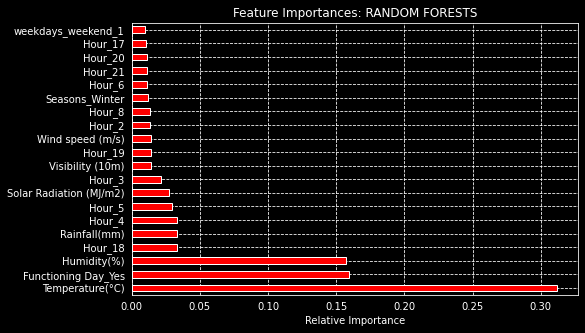

In [ ]:
# Feature importances
rf_feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(8,5))
plt.title('Feature Importances: RANDOM FORESTS')
plt.xlabel('Relative Importance')
rf_feat_imp.nlargest(20).plot(kind='barh', color='r') 

## **7.6-XG Boost Regression**

In [ ]:
# Using Pandas get Dummies for Encoding categorical features
df1 = pd.get_dummies(df,drop_first=True,sparse=False) 
X = df1.drop(columns=['Rented Bike Count'], axis=1)
y = np.sqrt(df1['Rented Bike Count'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [ ]:
# Initializing the model
xgb_r = xgb.XGBRegressor()

In [ ]:
#Fitting the model
xgb_r.fit(X_train, y_train)

[05:31:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
#Train Test values
y_pred_train_xgb = xgb_r.predict(X_train)
y_pred_test_xgb = xgb_r.predict(X_test)

In [ ]:
# Calculating Performance Metrics for train data
print_metrics((y_train), (y_pred_train_xgb))

MSE is: 21.073184205244345
RMSE is: 4.590553801584766
R2 score: is 0.8631528585390765
MAE is: 3.4604088000898527


In [ ]:
#adjusted R2 score
Adjusted_R2((y_train), (y_pred_train_xgb))

('Adjusted R2 :', 0.8601501434836781)

**R2 score value is 0.86 it means that our model is able to capture most of the data variance.**

In [ ]:
# Calculating Performance Metrics for Test data
print_metrics((y_test), (y_pred_test_xgb))

MSE is: 23.708875814619123
RMSE is: 4.869176091970707
R2 score: is 0.8499119096683334
MAE is: 3.6695411336005646


In [ ]:
#adjusted R2 score
Adjusted_R2((y_test), (y_pred_test_xgb))

('Adjusted R2 :', 0.8466186602539598)

In [ ]:
# Feature importances
xgb_r.feature_importances_

array([6.8816982e-02, 4.4810779e-02, 2.3555274e-03, 2.5329739e-03,
       4.1063119e-02, 5.5038329e-02, 0.0000000e+00, 6.4617880e-03,
       2.3201618e-02, 3.6660902e-02, 4.7320101e-02, 3.9830729e-02,
       2.1765575e-02, 0.0000000e+00, 1.9511521e-02, 0.0000000e+00,
       1.3451007e-02, 9.3416190e-03, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 3.7891222e-03, 2.1720586e-02,
       5.4531179e-02, 4.8402470e-02, 3.2616664e-02, 4.7736190e-02,
       4.3025091e-02, 5.7156137e-03, 3.6076470e-03, 3.3062031e-03,
       7.1470596e-02, 7.8896089e-03, 1.7300019e-01, 0.0000000e+00,
       5.1428024e-03, 2.7018555e-03, 0.0000000e+00, 7.1089650e-03,
       6.1454356e-04, 0.0000000e+00, 1.4060320e-04, 1.3129831e-02,
       1.1029454e-02, 1.8275700e-03, 9.3307337e-03], dtype=float32)

In [ ]:
features = X_train.columns
importances = xgb_r.feature_importances_
indices = np.argsort(importances)

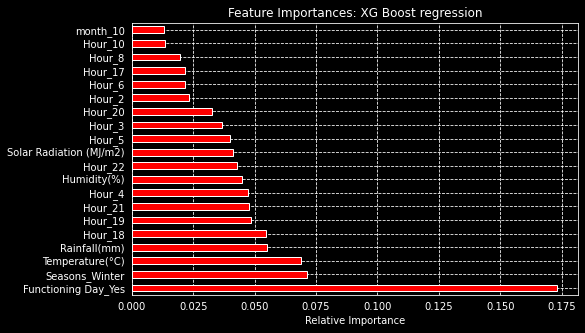

In [ ]:
# Feature importances
rf_feat_imp = pd.Series(xgb_r.feature_importances_, index=X.columns)
plt.figure(figsize=(8,5))
plt.title('Feature Importances: XG Boost regression')
plt.xlabel('Relative Importance')
rf_feat_imp.nlargest(20).plot(kind='barh', color='r') 
plt.show()

## **Hyperparameter Tuning**

**For improvement of our model lets do some Hyper parameter tuning.**

## **7.7-XG Boost Regressor with GridSearchCV**

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
parameter_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
parameter_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

In [ ]:
# Create an instance of the XG Boost Regressor
xg_boost = xgb.XGBRegressor()

# Grid search
xg_grid = GridSearchCV(estimator=xg_boost,
                       param_grid = parameter_dict,
                       cv = 5, verbose=2)

xg_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[05:33:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[05:33:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[05:33:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[05:33:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[05:33:06] WARNING: /works

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [ ]:
xg_grid.best_estimator_

XGBRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [ ]:
xg_optimal_model = xg_grid.best_estimator_

In [ ]:
#Train Test values
y_pred_train_xg_opt = xg_optimal_model.predict(X_train)
y_pred_test_xg_opt= xg_optimal_model.predict(X_test)

In [ ]:
# Calculating Performance Metrics for train data
print_metrics((y_train), (y_pred_train_xg_opt))

MSE is: 4.059746697992111
RMSE is: 2.0148813111426964
R2 score: is 0.9736364127383567
MAE is: 1.377916686777391


In [ ]:
#adjusted R2 score
Adjusted_R2((y_train), (y_pred_train_xg_opt))

('Adjusted R2 :', 0.9730579400019901)

In [ ]:
# Calculating Performance Metrics for test data
print_metrics((y_test), (y_pred_test_xg_opt))

MSE is: 13.980201717845725
RMSE is: 3.7390107940263726
R2 score: is 0.9114988920314332
MAE is: 2.5267025048184246


In [ ]:
#adjusted R2 score
Adjusted_R2((y_test), (y_pred_test_xg_opt))

('Adjusted R2 :', 0.9095569909695645)

In [ ]:
xg_optimal_model.feature_importances_

array([0.02025816, 0.0174529 , 0.00126562, 0.00145027, 0.00661327,
       0.03226612, 0.00181978, 0.004811  , 0.04044073, 0.04802452,
       0.05630353, 0.05240968, 0.02179706, 0.006768  , 0.02456177,
       0.00290274, 0.01054254, 0.0090678 , 0.00190597, 0.00179658,
       0.00117202, 0.00228033, 0.00532703, 0.03668127, 0.06595007,
       0.04854019, 0.05957427, 0.04715436, 0.04674775, 0.01496609,
       0.0083527 , 0.00265786, 0.05144427, 0.00313029, 0.2094047 ,
       0.001649  , 0.0019836 , 0.0021212 , 0.00295584, 0.00600426,
       0.00126908, 0.00265012, 0.00212533, 0.00450596, 0.00384445,
       0.0007825 , 0.00426742], dtype=float32)

In [ ]:
xg_optimal_model.fit(X_train,y_train)

[05:38:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [ ]:
features = X_train.columns
importance = xg_optimal_model.feature_importances_
index = np.argsort(importance)

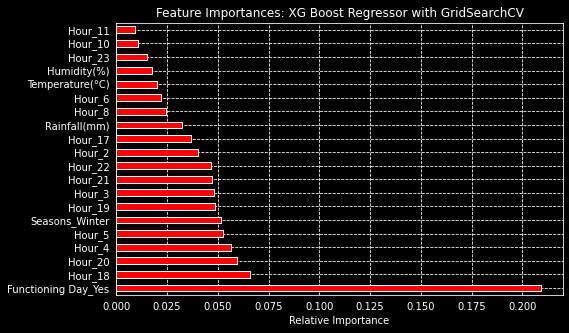

In [ ]:
# Feature importances
rf_feat_imp = pd.Series(xg_optimal_model.feature_importances_, index=X.columns)
plt.figure(figsize=(8,5))
plt.title('Feature Importances: XG Boost Regressor with GridSearchCV')
plt.xlabel('Relative Importance')
rf_feat_imp.nlargest(20).plot(kind='barh', color='r') 
plt.show()



## **XG Boost model explainability using Shapley values:**

* We will use Shapley values to explain the black box model(XG boost).
It shows the contribution or the importance of each feature on the prediction of the model. This makes it more explainable.

In [149]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 23.3 MB/s eta 0:00:00


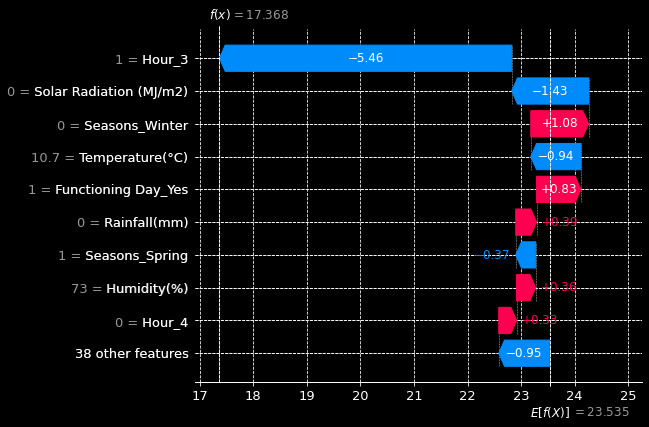

In [150]:
# importing shap
import shap 

#Get shap values
explainer = shap.Explainer(xgb_r)
shap_values = explainer(X_test)

# Waterfall plot for first observation
shap.plots.waterfall(shap_values[0])


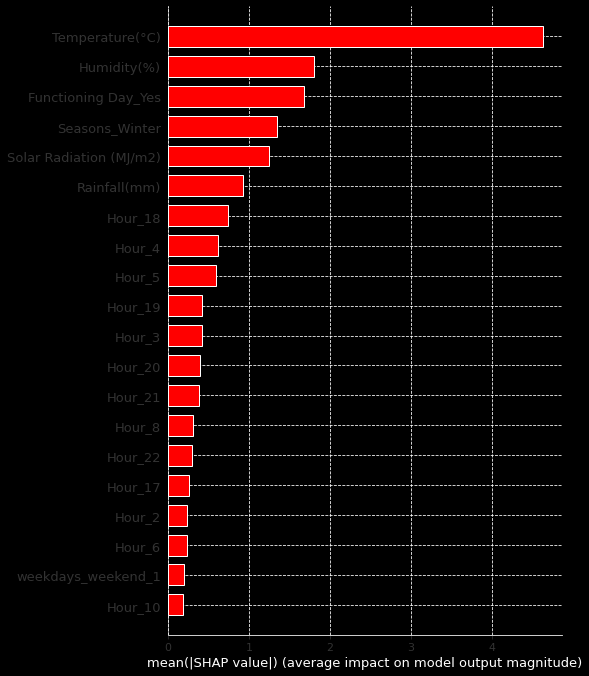

In [151]:
# Obtain a Bar Summary Plot
shap.summary_plot(shap_values, X_train, plot_type="bar",color='r')

**The above plot gives the average feature shapley values.**

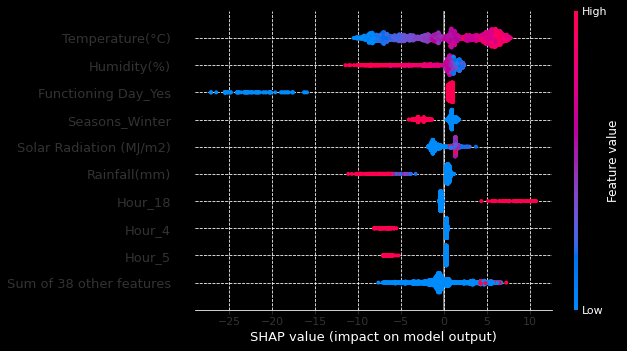

In [152]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

**The above plot is called bee swarm plot, which helps us understand the global importance / contribution of each feature.**

# **CONCLUSIONS**

**EDA summary:**

* Dependent feature is positively skewed, therefore, square root of dependent feature is used in ML modeling.
* Most of bikes have been rented in summer followed by Autumn, Spring and winter.
* Use of rented bike is more on 'No holiday' means on working days as compared to 'Holiday.
* **Normally distributed features:** Temperature, Humidity, Dew point temperature(oC).
* **Positively skewed features:** Wind, solar radiation, snowfall, rainfall.
* **Negatively skewed features:** Visibility.
* **Positive linear related features:** Hour, Temperature, Wind speed, visibility and solar radiation.
* **Negatively linear related features:** Rainfall, Snowfall, Humidity.
* Temperature and Dew point was high correlated and multi-collinearity. we removed dew point temperature column.


**ML modelling summary:**
* As our primary goal is to make a ML model to predict the demand for rental bikes based on different weather and others conditions. We trained seven unique Machine learning models and improved their performance through hyper-parameter tuning.
* The XG Boost prediction model had the lowest RMSE.
* The final choice of model for deployment depends on the business need; if high accuracy in results is necessary, we can deploy XG Boost model.
* If the model interpretability is important to the stakeholders, we can choose deploy the decision tree model.

## **8-Final Observations:**

**Out of all above models Random forest Regressor gives the highest R2 score of 98% for Train Set and XG Boost Gridsearch CV gives the highest R2 score of 91% for Test set.**

**No overfitting is seen.**

**We can deploy XG Boost Gridsearch CV model.**